<a href="https://colab.research.google.com/github/manugroot/UNT_SPring2022_DeepLearning_Project/blob/main/Merging_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from scipy import ndimage, misc
import skimage
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout


import plotly.graph_objects as go
from IPython.display import display, Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Dog_breed.zip
!unzip /content/drive/MyDrive/cat_breed.zip

Streaming output truncated to the last 5000 lines.
  inflating: cat_breed/Tabby/46213210_51771.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46213210_51771.jpg  
  inflating: cat_breed/Tabby/46051133_9708.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46051133_9708.jpg  
  inflating: cat_breed/Tabby/46613679_10192.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46613679_10192.jpg  
  inflating: cat_breed/Tabby/46436202_31283.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46436202_31283.jpg  
  inflating: cat_breed/Tabby/46142989_57601.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46142989_57601.jpg  
  inflating: cat_breed/Tabby/46607011_11172.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46607011_11172.jpg  
  inflating: cat_breed/Tabby/46621576_8942.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46621576_8942.jpg  
  inflating: cat_breed/Tabby/46120077_8695.jpg  
  inflating: __MACOSX/cat_breed/Tabby/._46120077_8695.jpg  
  inflating: cat_breed/Tabby/46225431_50817.jpg  
  inflating: __MA

## **LOADING THE WEIGHTS OF CAT BREED IDENTIFICATION MODEL**

In [4]:
#LOADING THE WEIGHTS OF THE DEEP LEARNING NETWORK
# load json and create model
from keras.models import model_from_json

json_file = open('/content/drive/MyDrive/model_cat1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_cat = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_cat.load_weights("/content/drive/MyDrive/model_cat1.h5")
print("Loaded Cat Breed model from disk")


Loaded Cat Breed model from disk


# **LOADING THE WEIGHTS OF DOG BREED IDENTIFICATION MODEL**

In [5]:
from keras.models import model_from_json
# load json and create model
json_file = open('/content/drive/MyDrive/model_dog1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_dog = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_dog.load_weights("/content/drive/MyDrive/model_dog1.h5")
print("Loaded dog breed model from disk")

Loaded dog breed model from disk


# **LOADING THE WEIGHTS OF CAT OR DOG IDENTIFICATION MODEL**:

In [6]:
from keras.models import model_from_json
# load json and create model
json_file = open('/content/drive/MyDrive/model_cat_vs_dog1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_cat_dog = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_cat_dog.load_weights("/content/drive/MyDrive/model_cat_vs_dog1.h5")
print("Loaded cat vs dog model from disk")

Loaded cat vs dog model from disk


## **LOADING THE HISTORY OF CAT BREED MODEL**

In [7]:
history_cat=np.load('/content/drive/MyDrive/my_history_cat.npy',allow_pickle='TRUE').item()

## **LOADING THE HISTORY OF DOG BREED MODEL**

In [8]:
history_dog=np.load('/content/drive/MyDrive/my_history_dog.npy',allow_pickle='TRUE').item()

### **LOADING THE HISTORY OF CAT OR DOG CLASSIFICATION MODEL**

In [9]:
history_cat_dog=np.load('/content/drive/MyDrive/my_history_cat_dog.npy',allow_pickle='TRUE').item()

In [10]:
history_cat_dog

{'accuracy': [0.8536780476570129,
  0.8988696336746216,
  0.9096391201019287,
  0.9178274273872375,
  0.9241466522216797,
  0.9305549263954163,
  0.9329580068588257,
  0.9340705871582031,
  0.9355391263961792,
  0.9380534887313843],
 'loss': [0.38249263167381287,
  0.26644405722618103,
  0.23960041999816895,
  0.21978066861629486,
  0.20443055033683777,
  0.19306261837482452,
  0.18506485223770142,
  0.1859237104654312,
  0.1808548867702484,
  0.17873819172382355],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.2680017948150635,
  0.4086337387561798,
  0.9021806716918945,
  0.6525144577026367,
  0.7410770058631897,
  0.9062750339508057,
  0.6384512782096863,
  0.5950155854225159,
  0.9392968416213989,
  0.900133490562439],
 'val_loss': [2.300960063934326,
  1.379271388053894,
  0.25066694617271423,
  0.6907400488853455,
  0.5799254179000854,
  0.23188579082489014,
  1.300278902053833,
  0.9854048490524292,
  0.1861036717891693,
  0.62

## **ACCURACY VISUALIZATION OF CAT BREED MODEL**

In [11]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_cat['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history_cat['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

<Figure size 432x288 with 0 Axes>

In [12]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_cat['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history_cat['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Cat breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')


fig.show()

<Figure size 432x288 with 0 Axes>

## **ACCURACY VISUALIZATION OF DOG BREED MODEL**

In [13]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_dog['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history_dog['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

<Figure size 432x288 with 0 Axes>

In [14]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_dog['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history_dog['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')


fig.show()

<Figure size 432x288 with 0 Axes>

## **ACCURACY VISUALIZATION OF CAT or DOG MODEL**

In [15]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_cat_dog['accuracy'],
                    name='Train'))

fig.add_trace(go.Scatter(
                    y=history_cat_dog['val_accuracy'],
                    name='Valid'))


fig.update_layout(height=450, 
                  width=600,
                  title='Accuracy for Cat or Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='Accuracy')

fig.show()

<Figure size 432x288 with 0 Axes>

In [16]:
plt.clf()
fig = go.Figure()
fig.add_trace(go.Scatter(
                    y=history_cat_dog['loss'],
                    name='LOSS'))

fig.add_trace(go.Scatter(
                    y=history_cat_dog['val_loss'],
                    name='VAL_LOSS'))


fig.update_layout(height=450, 
                  width=600,
                  title='LOSS for Cat or Dog breed',
                  xaxis_title='Epoch',
                  yaxis_title='LOSS')


fig.show()

<Figure size 432x288 with 0 Axes>

## **PREPARING THE TEST DATA FOR ANALYZING THE MODEL**

In [17]:
df_full = pd.read_csv('/content/drive/MyDrive/df_full_cats_dogs.csv')

In [18]:
df_full

,Unnamed: 0,Imagepath,Animal,Labels
0,0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,1,boston_bull
1,1,/content/train/f706682a30021cc74cd9416dac25e94...,1,dingo
2,2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,1,pekinese
3,3,/content/train/65a3a8d1011f95e937d77e3a79700da...,1,bluetick
4,4,/content/train/324759773574e9bd6d6ba9c58e1550f...,1,golden_retriever
...,...,...,...,...
56192,45970,/content/cat_breed/American Bobtail/22833651_3...,0,American Bobtail
56193,45971,/content/cat_breed/American Bobtail/18490404_4...,0,American Bobtail
56194,45972,/content/cat_breed/American Bobtail/37275567_1...,0,American Bobtail
56195,45973,/content/cat_breed/American Bobtail/20529323_4...,0,American Bobtail


In [19]:
df = df_full[['Imagepath','Animal','Labels']].copy()

In [20]:
df

,Imagepath,Animal,Labels
0,/content/train/b9f96dd0c9f3dc7e755d9b8cbb124f3...,1,boston_bull
1,/content/train/f706682a30021cc74cd9416dac25e94...,1,dingo
2,/content/train/8f3e10fab6ea57479f91a5c6efc1135...,1,pekinese
3,/content/train/65a3a8d1011f95e937d77e3a79700da...,1,bluetick
4,/content/train/324759773574e9bd6d6ba9c58e1550f...,1,golden_retriever
...,...,...,...
56192,/content/cat_breed/American Bobtail/22833651_3...,0,American Bobtail
56193,/content/cat_breed/American Bobtail/18490404_4...,0,American Bobtail
56194,/content/cat_breed/American Bobtail/37275567_1...,0,American Bobtail
56195,/content/cat_breed/American Bobtail/20529323_4...,0,American Bobtail


In [21]:
df["Animal"] = df["Animal"].replace({0:'cat',1:'dog'})
train_df,test_df = train_test_split(df,test_size=0.0001,
  random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_test=test_df.shape[0]
batch_size=15

In [22]:
test_df['Animal'].value_counts()

cat    4
dog    2
Name: Animal, dtype: int64

In [23]:
test_df

,Imagepath,Animal,Labels
0,/content/cat_breed/Siamese/46114406_2874.jpg,cat,Siamese
1,/content/cat_breed/Maine Coon/44735066_4242.jpg,cat,Maine Coon
2,/content/cat_breed/Dilute Calico/36141537_5006...,cat,Dilute Calico
3,/content/cat_breed/Tuxedo/45500904_3343.jpg,cat,Tuxedo
4,/content/train/132538caad57960ca3c9162e2f4a849...,dog,australian_terrier
5,/content/train/91af3f0d18e5bd9b09a145ff5db9cb6...,dog,toy_poodle


## **Image data generation for dog breed model.**

In [24]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
test_dog = img_datagen.flow_from_dataframe(dataframe = test_df, 
                                         x_col='Imagepath', y_col='Labels',  
                                         target_size=(299, 299), shuffle=False, 
                                         batch_size=10, seed=10)

Found 6 validated image filenames belonging to 6 classes.


In [25]:
labels_dog = test_dog.class_indices
labels_dog

{'Dilute Calico': 0,
 'Maine Coon': 1,
 'Siamese': 2,
 'Tuxedo': 3,
 'australian_terrier': 4,
 'toy_poodle': 5}

## **Image data generation for cat breed model.**

In [26]:
img_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
test_cat = img_datagen.flow_from_dataframe(dataframe = test_df, 
                                         x_col='Imagepath', y_col='Labels',  
                                         target_size=(299, 299), shuffle=False, 
                                         batch_size=10, seed=10)

Found 6 validated image filenames belonging to 6 classes.


In [27]:
labels_cat = test_cat.class_indices
labels_cat

{'Dilute Calico': 0,
 'Maine Coon': 1,
 'Siamese': 2,
 'Tuxedo': 3,
 'australian_terrier': 4,
 'toy_poodle': 5}

## **Image data generation for cat or dog model.**

In [28]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_cat_dog = test_datagen.flow_from_dataframe(test_df,
                                                 x_col='Imagepath',y_col='Animal',
                                                 target_size=(128,128),
                                                 class_mode='categorical',
                                                 batch_size=15)

Found 6 validated image filenames belonging to 2 classes.


## **CAT or DOG Labelling while training the model**

In [29]:
labels_cat_dog = test_cat_dog.class_indices
labels_cat_dog

{'cat': 0, 'dog': 1}

In [30]:
rev_labels_cat_dog = {value:key for key, value in labels_cat_dog.items()}
rev_labels_cat_dog

{0: 'cat', 1: 'dog'}

## **CAT Labelling while training the model**

In [31]:
labels_cat = {'Bombay': 0,
 'British Shorthair': 1,
 'Burmese': 2,
 'Calico': 3,
 'Dilute Calico': 4,
 'Himalayan': 5,
 'Munchkin': 6,
 'Ragdoll': 7,
 'Russian Blue': 8,
 'Siberian': 9}

In [32]:
rev_labels_cat = {value:key for key, value in labels_cat.items()}
rev_labels_cat

{0: 'Bombay',
 1: 'British Shorthair',
 2: 'Burmese',
 3: 'Calico',
 4: 'Dilute Calico',
 5: 'Himalayan',
 6: 'Munchkin',
 7: 'Ragdoll',
 8: 'Russian Blue',
 9: 'Siberian'}

## **DOG Labelling while training the model**

In [33]:
labels_dog = {'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd': 46,
 'german_short-haired_pointer': 47,
 'giant_schnauzer': 48,
 'golden_retriever': 49,
 'gordon_setter': 50,
 'great_dane': 51,
 'great_pyrenees': 52,
 'greater_swiss_mountain_dog': 53,
 'groenendael': 54,
 'ibizan_hound': 55,
 'irish_setter': 56,
 'irish_terrier': 57,
 'irish_water_spaniel': 58,
 'irish_wolfhound': 59,
 'italian_greyhound': 60,
 'japanese_spaniel': 61,
 'keeshond': 62,
 'kelpie': 63,
 'kerry_blue_terrier': 64,
 'komondor': 65,
 'kuvasz': 66,
 'labrador_retriever': 67,
 'lakeland_terrier': 68,
 'leonberg': 69,
 'lhasa': 70,
 'malamute': 71,
 'malinois': 72,
 'maltese_dog': 73,
 'mexican_hairless': 74,
 'miniature_pinscher': 75,
 'miniature_poodle': 76,
 'miniature_schnauzer': 77,
 'newfoundland': 78,
 'norfolk_terrier': 79,
 'norwegian_elkhound': 80,
 'norwich_terrier': 81,
 'old_english_sheepdog': 82,
 'otterhound': 83,
 'papillon': 84,
 'pekinese': 85,
 'pembroke': 86,
 'pomeranian': 87,
 'pug': 88,
 'redbone': 89,
 'rhodesian_ridgeback': 90,
 'rottweiler': 91,
 'saint_bernard': 92,
 'saluki': 93,
 'samoyed': 94,
 'schipperke': 95,
 'scotch_terrier': 96,
 'scottish_deerhound': 97,
 'sealyham_terrier': 98,
 'shetland_sheepdog': 99,
 'shih-tzu': 100,
 'siberian_husky': 101,
 'silky_terrier': 102,
 'soft-coated_wheaten_terrier': 103,
 'staffordshire_bullterrier': 104,
 'standard_poodle': 105,
 'standard_schnauzer': 106,
 'sussex_spaniel': 107,
 'tibetan_mastiff': 108,
 'tibetan_terrier': 109,
 'toy_poodle': 110,
 'toy_terrier': 111,
 'vizsla': 112,
 'walker_hound': 113,
 'weimaraner': 114,
 'welsh_springer_spaniel': 115,
 'west_highland_white_terrier': 116,
 'whippet': 117,
 'wire-haired_fox_terrier': 118,
 'yorkshire_terrier': 119}

In [34]:
rev_labels_dog = {value:key for key, value in labels_dog.items()}
rev_labels_dog

{0: 'affenpinscher',
 1: 'afghan_hound',
 2: 'african_hunting_dog',
 3: 'airedale',
 4: 'american_staffordshire_terrier',
 5: 'appenzeller',
 6: 'australian_terrier',
 7: 'basenji',
 8: 'basset',
 9: 'beagle',
 10: 'bedlington_terrier',
 11: 'bernese_mountain_dog',
 12: 'black-and-tan_coonhound',
 13: 'blenheim_spaniel',
 14: 'bloodhound',
 15: 'bluetick',
 16: 'border_collie',
 17: 'border_terrier',
 18: 'borzoi',
 19: 'boston_bull',
 20: 'bouvier_des_flandres',
 21: 'boxer',
 22: 'brabancon_griffon',
 23: 'briard',
 24: 'brittany_spaniel',
 25: 'bull_mastiff',
 26: 'cairn',
 27: 'cardigan',
 28: 'chesapeake_bay_retriever',
 29: 'chihuahua',
 30: 'chow',
 31: 'clumber',
 32: 'cocker_spaniel',
 33: 'collie',
 34: 'curly-coated_retriever',
 35: 'dandie_dinmont',
 36: 'dhole',
 37: 'dingo',
 38: 'doberman',
 39: 'english_foxhound',
 40: 'english_setter',
 41: 'english_springer',
 42: 'entlebucher',
 43: 'eskimo_dog',
 44: 'flat-coated_retriever',
 45: 'french_bulldog',
 46: 'german_sheph

## **DOG Prediction**

In [35]:
predictions_dog = loaded_model_dog.predict(test_dog)
predictions_dog = np.argmax(predictions_dog, axis=1)
predictions_dog

array([ 29,  29, 100,  42,  42,  42])

In [36]:
#test_df["Labels"].replace(labels_dog, inplace = True)

In [37]:
pred_dog = list(predictions_dog)
pred_dog

[29, 29, 100, 42, 42, 42]

In [38]:
conv_pred_dog = [rev_labels_dog[i] for i in pred_dog]
conv_pred_dog

['chihuahua',
 'chihuahua',
 'shih-tzu',
 'entlebucher',
 'entlebucher',
 'entlebucher']

## **CAT Prediction**

In [39]:
predictions_cat = loaded_model_cat.predict(test_cat)
predictions_cat = np.argmax(predictions_cat, axis=1)
predictions_cat

array([7, 7, 7, 7, 7, 0])

In [40]:
pred_cat = list(predictions_cat)
pred_cat

[7, 7, 7, 7, 7, 0]

In [41]:
#test_df["Labels"].replace(labels_cat, inplace = True)

In [42]:
conv_pred_cat = [rev_labels_cat[i] for i in pred_cat]
conv_pred_cat

['Ragdoll', 'Ragdoll', 'Ragdoll', 'Ragdoll', 'Ragdoll', 'Bombay']

## **CAT or DOG Prediction**

In [43]:
predictions_cat_dog = loaded_model_cat_dog.predict(test_cat_dog)
predictions_cat_dog = np.argmax(predictions_cat_dog, axis=1)
predictions_cat_dog

array([1, 0, 0, 1, 0, 0])

In [44]:
#test_df["Animal"].replace(labels_cat_dog, inplace = True)

In [45]:
pred_cat_dog = list(predictions_cat_dog)
pred_cat_dog

[1, 0, 0, 1, 0, 0]

In [46]:
pred_cat_dog

[1, 0, 0, 1, 0, 0]

In [47]:
conv_pred_cat_dog = [rev_labels_cat_dog[i] for i in pred_cat_dog]
conv_pred_cat_dog

['dog', 'cat', 'cat', 'dog', 'cat', 'cat']

## **Making a new prediction columns one for breed and the other for animal**

In [48]:
pred_breed = []
for i in range(0,len(pred_cat_dog)):
  if pred_cat_dog[i] == 0:
    pred_breed.append(conv_pred_cat[i])
  else:
    pred_breed.append(conv_pred_dog[i])

In [49]:
pred_breed

['chihuahua', 'Ragdoll', 'Ragdoll', 'entlebucher', 'Ragdoll', 'Bombay']

In [50]:
test_df["Pred_Breed"] = pred_breed
test_df["Pred_Animal"] = conv_pred_cat_dog

In [51]:
test_df

,Imagepath,Animal,Labels,Pred_Breed,Pred_Animal
0,/content/cat_breed/Siamese/46114406_2874.jpg,cat,Siamese,chihuahua,dog
1,/content/cat_breed/Maine Coon/44735066_4242.jpg,cat,Maine Coon,Ragdoll,cat
2,/content/cat_breed/Dilute Calico/36141537_5006...,cat,Dilute Calico,Ragdoll,cat
3,/content/cat_breed/Tuxedo/45500904_3343.jpg,cat,Tuxedo,entlebucher,dog
4,/content/train/132538caad57960ca3c9162e2f4a849...,dog,australian_terrier,Ragdoll,cat
5,/content/train/91af3f0d18e5bd9b09a145ff5db9cb6...,dog,toy_poodle,Bombay,cat


In [52]:
test_df

,Imagepath,Animal,Labels,Pred_Breed,Pred_Animal
0,/content/cat_breed/Siamese/46114406_2874.jpg,cat,Siamese,chihuahua,dog
1,/content/cat_breed/Maine Coon/44735066_4242.jpg,cat,Maine Coon,Ragdoll,cat
2,/content/cat_breed/Dilute Calico/36141537_5006...,cat,Dilute Calico,Ragdoll,cat
3,/content/cat_breed/Tuxedo/45500904_3343.jpg,cat,Tuxedo,entlebucher,dog
4,/content/train/132538caad57960ca3c9162e2f4a849...,dog,australian_terrier,Ragdoll,cat
5,/content/train/91af3f0d18e5bd9b09a145ff5db9cb6...,dog,toy_poodle,Bombay,cat


In [53]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

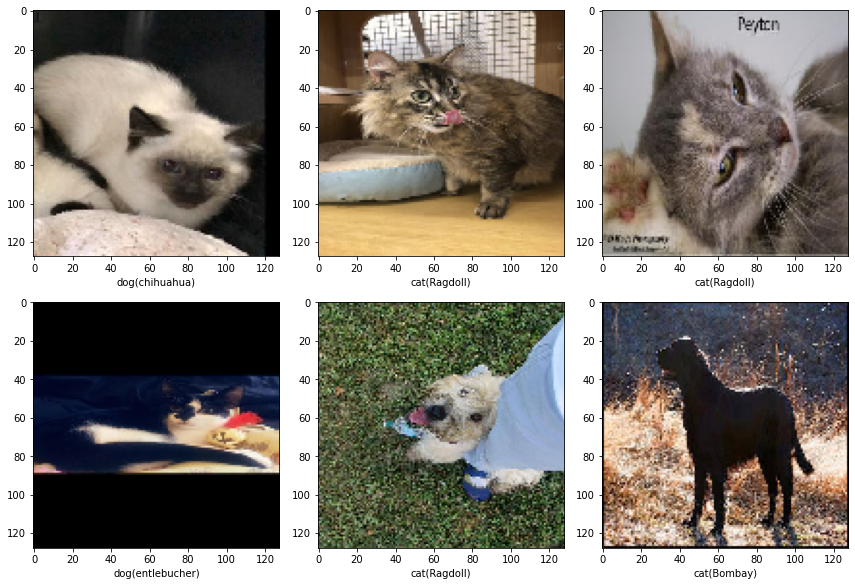

In [54]:
plt.figure(figsize=(12, 24))
for index, row in test_df.iterrows():
    filename = row['Imagepath']
    #category = row['category']
    img = load_img(filename, target_size=(128,128))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(row['Pred_Animal'] + '(' + "{}".format(row['Pred_Breed']) + ')' )
plt.tight_layout()
plt.show()